In [1]:
import polygontorus_openmc as pt
import numpy as np
import matplotlib.pyplot as plt
import openmc

* On the internet we found an image of the ITER poloidal section eg.: https://www.researchgate.net/figure/Poloidal-cross-section-of-the-Alite-ITER-model-and-installation-position-of-the-in-vessel_fig3_313274231
* We have used the WebPlotDigitizer tool https://apps.automeris.io/wpd4/
to align the axis and outlined convex features of the divertor and the inside of the vacuum vessel.
* We exported the shapes into CSV files.

In [2]:
def get_PT(csv_filename):
    points = np.array([[float(s) for s in ps.split(',')] for ps in open(csv_filename, 'r').readlines()])
    return pt.PolygonTorus(points)

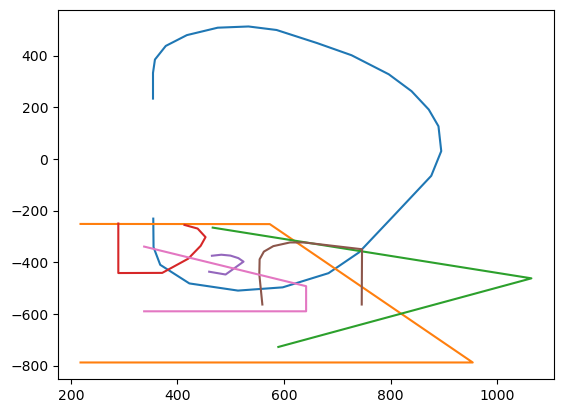

In [3]:
# vacuum vessel inside shell:
VV_i = get_PT('complex_example_data/VV_inside.csv')
#
De1 = get_PT('complex_example_data/De1_2.csv') # divertor envelope 1
De2 = get_PT('complex_example_data/De2_2.csv') # divertor envelope 1
# divertor sections
Da = get_PT('complex_example_data/Da_2.csv')
Db = get_PT('complex_example_data/Db_2.csv')
Dc = get_PT('complex_example_data/Dc_2.csv')
Dd = get_PT('complex_example_data/Dd_2.csv')

fig, ax = plt.subplots()
VV_i.polygon.PlotPolygon(mpl_axes=ax)
De1.polygon.PlotPolygon(mpl_axes=ax)
De2.polygon.PlotPolygon(mpl_axes=ax)
Da.polygon.PlotPolygon(mpl_axes=ax)
Db.polygon.PlotPolygon(mpl_axes=ax)
Dc.polygon.PlotPolygon(mpl_axes=ax)
Dd.polygon.PlotPolygon(mpl_axes=ax)

In [4]:
PR = VV_i.region_in & De1.region_out & De2.region_out # plasma region
DR = VV_i.region_in & (De1.region_in | De2.region_in) # divertor region
inside_divertor = Da.region_in | Db.region_in | Dc.region_in | Dd.region_in
outside_divertor = Da.region_out & Db.region_out & Dc.region_out & Dd.region_out
outside = VV_i.region_out

In [5]:
cells=[
       openmc.Cell(name='outside', region=outside),
       openmc.Cell(name='plasma region', region=PR),                              
       openmc.Cell(name='divertor', region= DR & inside_divertor),
       openmc.Cell(name='void around divertor', region= DR & outside_divertor),
]

In [6]:
universe = openmc.Universe(cells=cells)

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

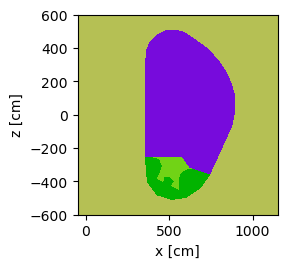

In [7]:
universe.plot(basis='xz', origin=(550, 0, 0), width=(1200,1200))

In [8]:
geo = openmc.Geometry()
geo.root_universe = universe
_cells = geo.get_all_cells()
_surfs = geo.get_all_surfaces()
print(len(_cells))
print(len(_surfs))

4
111


As we can see it is a very simple, but quite representative model.